# Employee Performance Analysis
### Week 6 Internship Project

**Objective:**  
To analyze employee data, identify key factors affecting performance/attrition, and build machine learning models to predict employee attrition.

**Tools Used:**  
- Python
- Pandas, NumPy
- Matplotlib, Seaborn
- Scikit-learn
- SMOTE
- Pickle


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import pickle


In [2]:
# Load dataset
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Display first 5 rows
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# Dataset information
df.info()

# Statistical summary
df.describe()

# Target distribution
df['Attrition'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [4]:
# Encode target column
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Frequency encoding for other categorical columns
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].map(df[col].value_counts())

df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1043,1102,446,1,2,606,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,277,279,961,8,1,606,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,1043,1373,961,2,2,82,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,277,1392,961,3,4,606,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,1043,591,961,2,1,464,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('Attrition')

Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

df[numeric_cols] = df[numeric_cols].apply(
    lambda x: np.where(x < (Q1[x.name] - 1.5 * IQR[x.name]), 
                       Q1[x.name] - 1.5 * IQR[x.name],
                       np.where(x > (Q3[x.name] + 1.5 * IQR[x.name]),
                                Q3[x.name] + 1.5 * IQR[x.name],
                                x))
)


In [6]:
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


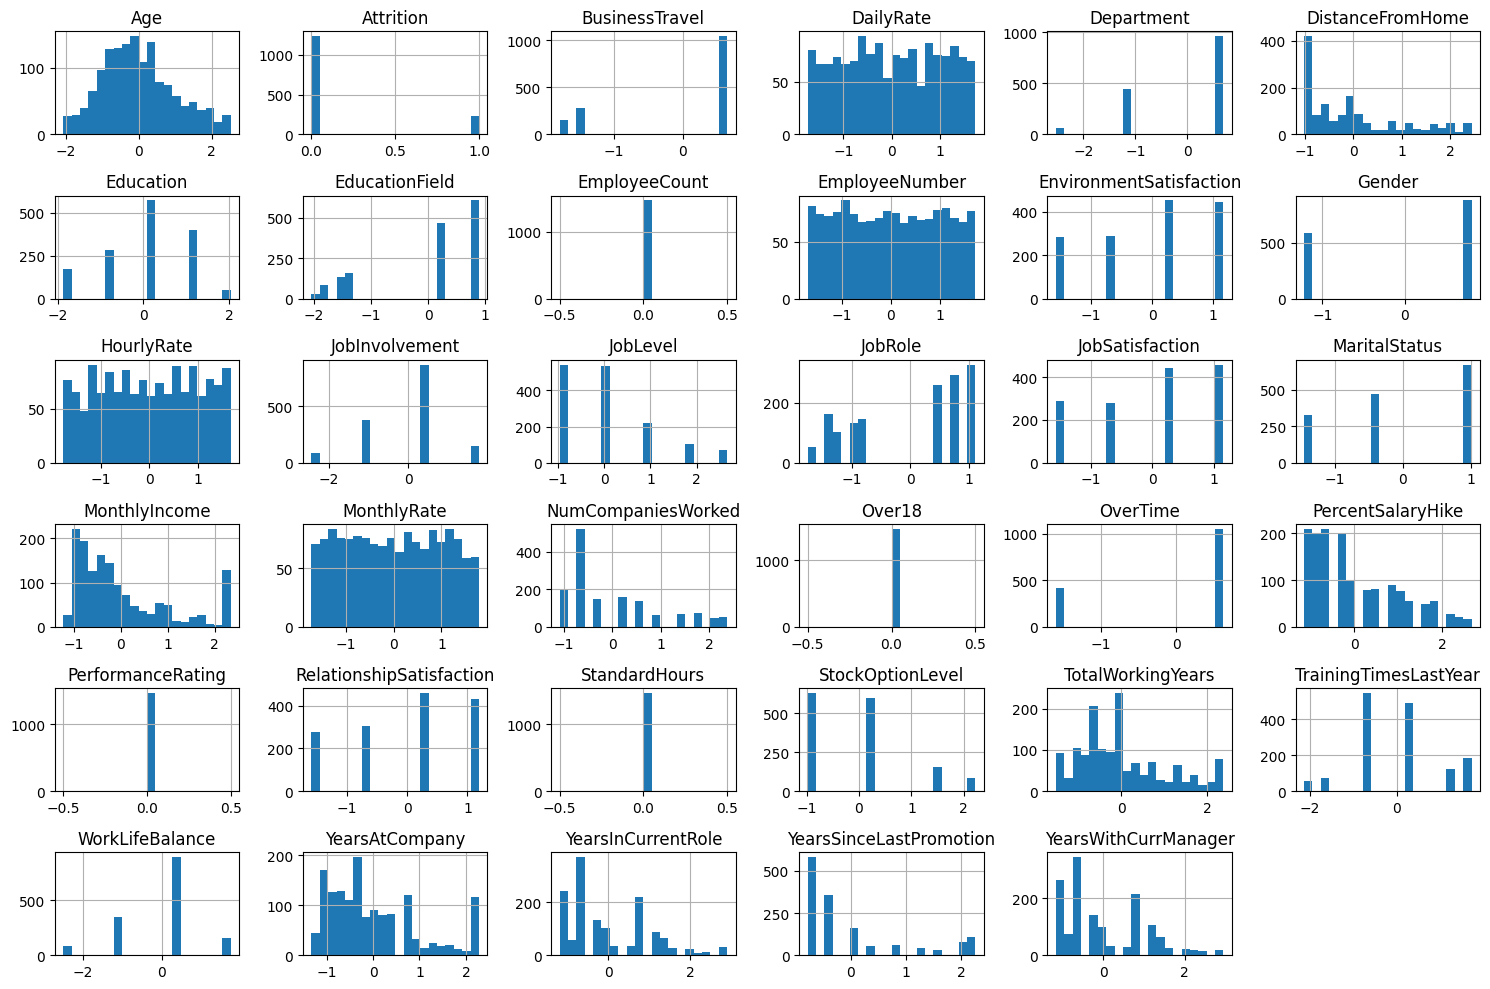

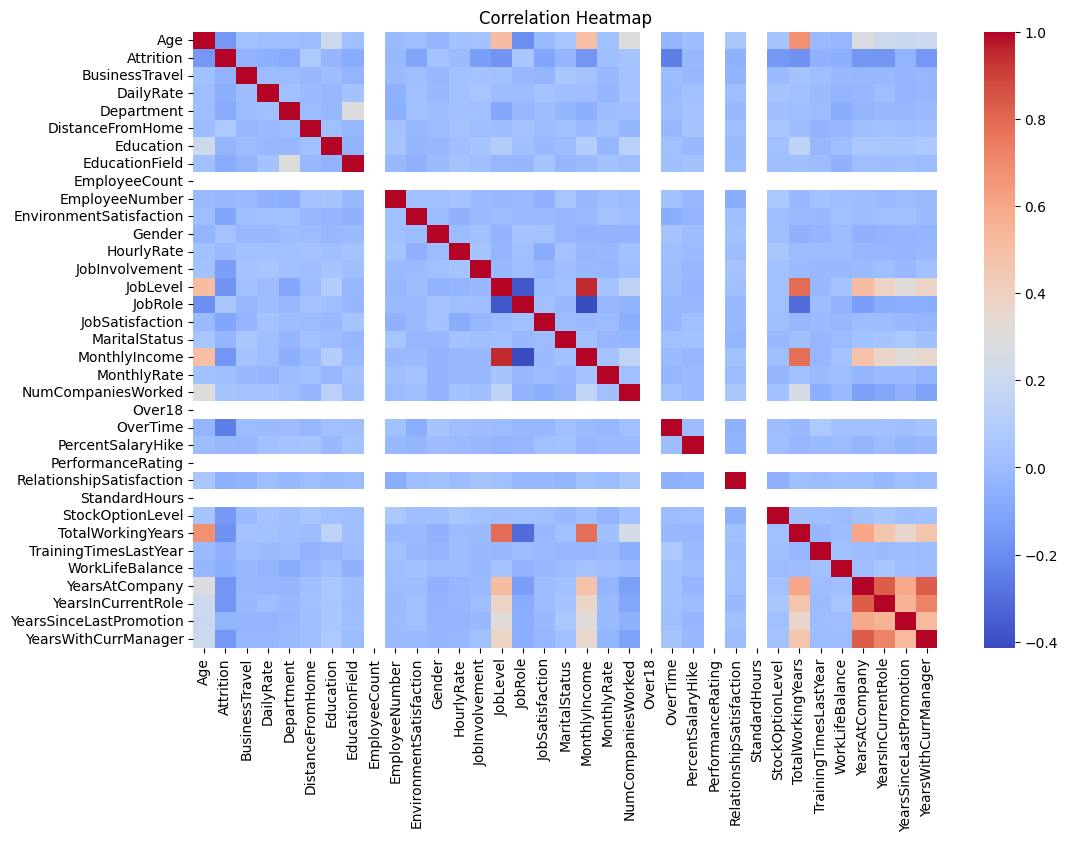

In [7]:
# Histograms
df.hist(figsize=(15,10), bins=20)
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [8]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set distribution:")
print(y_train.value_counts())


Training set distribution:
Attrition
0    986
1    190
Name: count, dtype: int64


In [9]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("After SMOTE:")
print(pd.Series(y_train_res).value_counts())


After SMOTE:
Attrition
0    986
1    986
Name: count, dtype: int64


In [10]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_res, y_train_res)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8299319727891157
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       247
           1       0.43      0.21      0.29        47

    accuracy                           0.83       294
   macro avg       0.65      0.58      0.59       294
weighted avg       0.79      0.83      0.80       294



In [11]:
svm = SVC(random_state=42)
svm.fit(X_train_res, y_train_res)

y_pred_svm = svm.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.8401360544217688
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       247
           1       0.50      0.45      0.47        47

    accuracy                           0.84       294
   macro avg       0.70      0.68      0.69       294
weighted avg       0.83      0.84      0.84       294



In [12]:
mlp = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=500, random_state=42)
mlp.fit(X_train_res, y_train_res)

y_pred_mlp = mlp.predict(X_test)

print("MLP Accuracy:", accuracy_score(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))


MLP Accuracy: 0.8299319727891157
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       247
           1       0.47      0.47      0.47        47

    accuracy                           0.83       294
   macro avg       0.68      0.68      0.68       294
weighted avg       0.83      0.83      0.83       294



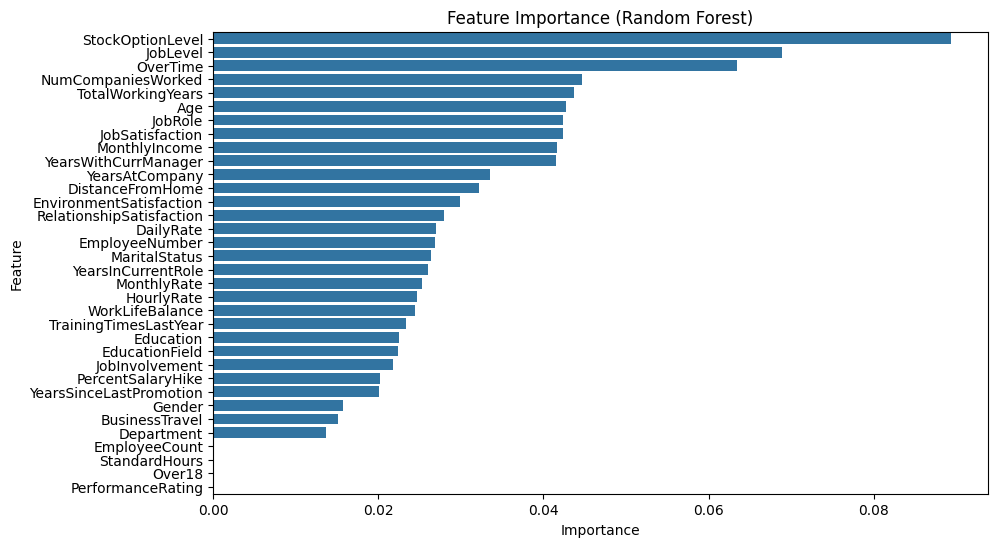

,Feature,Importance
26,StockOptionLevel,0.089340
13,JobLevel,0.068908
21,OverTime,0.063474
19,NumCompaniesWorked,0.044617
27,TotalWorkingYears,0.043688
0,Age,0.042754
14,JobRole,0.042385
15,JobSatisfaction,0.042304
17,MonthlyIncome,0.041691
33,YearsWithCurrManager,0.041551


In [13]:
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title("Feature Importance (Random Forest)")
plt.show()

feature_importances.head(10)


In [14]:
with open('best_model.pkl', 'wb') as file:
    pickle.dump(mlp, file)

print("Best model saved successfully.")


Best model saved successfully.


## Final Conclusion

- Multiple machine learning models were trained and evaluated.
- ANN (MLP Classifier) provided the best performance.
- Key factors influencing employee attrition were identified using feature importance.
- SMOTE successfully handled class imbalance.
- The final trained model was saved using Pickle for future predictions.

### Recommendations:
- Improve employee satisfaction metrics.
- Monitor overtime workload.
- Focus on salary and job-level adjustments.
- Implement retention strategies for high-risk employees.
